Assignment 1: Visualize the Data

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import anndata
adata = anndata.read_h5ad('../Data/Brain_AllenData.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 978067 × 550
    obs: 'brain_section_label', 'Slice', 'cluster_alias', 'average_correlation_score', 'matrix_label', 'donor_label', 'low_quality_mapping', 'donor_genotype', 'donor_sex', 'x', 'y', 'z', 'node_size', 'neurotransmitter', 'division', 'class', 'subclass', 'supertype', 'cluster'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'normalization', 'parent', 'parent_layer'


In [3]:
adata.obs_keys()

['brain_section_label',
 'Slice',
 'cluster_alias',
 'average_correlation_score',
 'matrix_label',
 'donor_label',
 'low_quality_mapping',
 'donor_genotype',
 'donor_sex',
 'x',
 'y',
 'z',
 'node_size',
 'neurotransmitter',
 'division',
 'class',
 'subclass',
 'supertype',
 'cluster']

In [33]:
print(type(adata.obs['brain_section_label']))
print(adata.obs['brain_section_label'])


<class 'pandas.core.series.Series'>
cell_label
1015221640100570419      C57BL6J-638850.01
1015221640100820600      C57BL6J-638850.01
1015221640100570430      C57BL6J-638850.01
1015221640100570438      C57BL6J-638850.01
1015221640100820610      C57BL6J-638850.01
                               ...        
1017201423100590639      C57BL6J-638850.67
1017201423100550444      C57BL6J-638850.67
1017201423100460203-1    C57BL6J-638850.67
1017201423100380114-1    C57BL6J-638850.67
1017201423100540125      C57BL6J-638850.67
Name: brain_section_label, Length: 978067, dtype: category
Categories (15, object): ['C57BL6J-638850.01', 'C57BL6J-638850.05', 'C57BL6J-638850.10', 'C57BL6J-638850.14', ..., 'C57BL6J-638850.52', 'C57BL6J-638850.57', 'C57BL6J-638850.61', 'C57BL6J-638850.67']


In [36]:
print(type(adata.obs['Slice']))
print(adata.obs['Slice'])

<class 'pandas.core.series.Series'>
cell_label
1015221640100570419      C57BL6J-638850.01
1015221640100820600      C57BL6J-638850.01
1015221640100570430      C57BL6J-638850.01
1015221640100570438      C57BL6J-638850.01
1015221640100820610      C57BL6J-638850.01
                               ...        
1017201423100590639      C57BL6J-638850.67
1017201423100550444      C57BL6J-638850.67
1017201423100460203-1    C57BL6J-638850.67
1017201423100380114-1    C57BL6J-638850.67
1017201423100540125      C57BL6J-638850.67
Name: Slice, Length: 978067, dtype: category
Categories (15, object): ['C57BL6J-638850.01', 'C57BL6J-638850.05', 'C57BL6J-638850.10', 'C57BL6J-638850.14', ..., 'C57BL6J-638850.52', 'C57BL6J-638850.57', 'C57BL6J-638850.61', 'C57BL6J-638850.67']


In [37]:
print(type(adata.obs['division']))
print(adata.obs['division'])

<class 'pandas.core.series.Series'>
cell_label
1015221640100570419      3 PAL-sAMY-TH-HY-MB-HB neuronal
1015221640100820600      3 PAL-sAMY-TH-HY-MB-HB neuronal
1015221640100570430      3 PAL-sAMY-TH-HY-MB-HB neuronal
1015221640100570438      3 PAL-sAMY-TH-HY-MB-HB neuronal
1015221640100820610      3 PAL-sAMY-TH-HY-MB-HB neuronal
                                      ...               
1017201423100590639                           6 Vascular
1017201423100550444                           6 Vascular
1017201423100460203-1                         6 Vascular
1017201423100380114-1                         6 Vascular
1017201423100540125                           6 Vascular
Name: division, Length: 978067, dtype: category
Categories (7, object): ['1 Pallium glutamatergic', '2 Subpallium GABAergic', '3 PAL-sAMY-TH-HY-MB-HB neuronal', '4 CBX-MOB-other neuronal', '5 Neuroglial', '6 Vascular', '7 Immune']


In [6]:
categories = ['division', 'class', 'subclass', 'supertype', 'cluster']
classes = adata.obs['class'].value_counts()
cell_labels = []

print(classes)

class
01 IT-ET Glut        173049
28 Astro-Epen        154623
29 Oligo             131931
31 Vascular          109710
06 CNU GABA           69872
25 CB Glut            64534
02 NP-CT-L6b Glut     41486
24 CB GABA            34021
03 MOB-DG-IMN         27491
05 MGE GABA           21901
16 MB Glut            17478
09 TH Glut            13947
20 MB GABA            13513
32 Immune             12535
19 MY Glut            12268
04 CGE GABA           11058
22 MY GABA            11028
11 HY GABA            10077
14 CNU-HYa GABA        9285
15 HY Glut             8650
13 CNU-HYa Glut        6268
17 P Glut              5427
07 LSX GABA            5078
30 OEG                 4082
21 P GABA              3806
12 MOB-CR Glut         2747
23 MB Dopa             1020
08 MH-LH Glut           630
18 MB-HB Sero           495
10 HY MM Glut            26
26 HY Gnrh1 Glut         16
27 Pineal Glut           15
Name: count, dtype: int64


<class 'pandas.core.series.Series'>


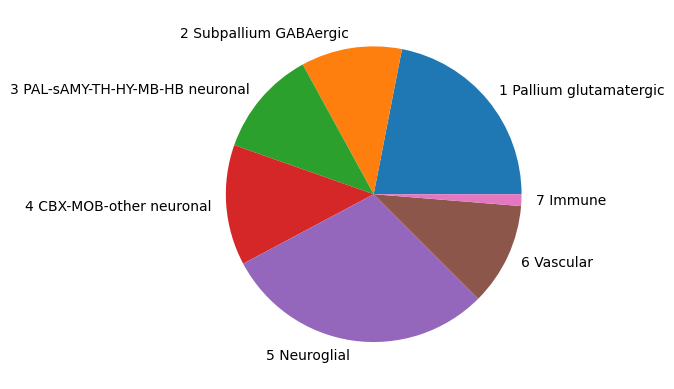

[214535, 107909, 113918, 128824, 290636, 109710, 12535]


In [17]:
fig, axs = plt.subplots()

divisions = adata.obs['division'].value_counts()
divisions = divisions.sort_index()

cell_types = divisions.index
cell_counts = []

for i, division in enumerate(divisions):
    cell_counts.append(division)
    

axs.pie(cell_counts, labels=cell_types)
plt.show()
print(cell_counts)

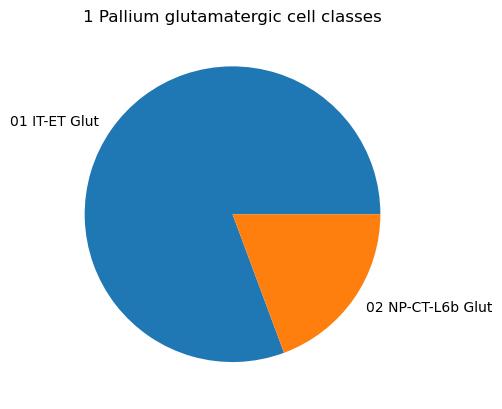

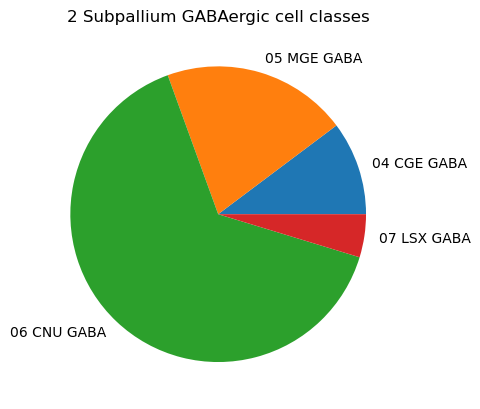

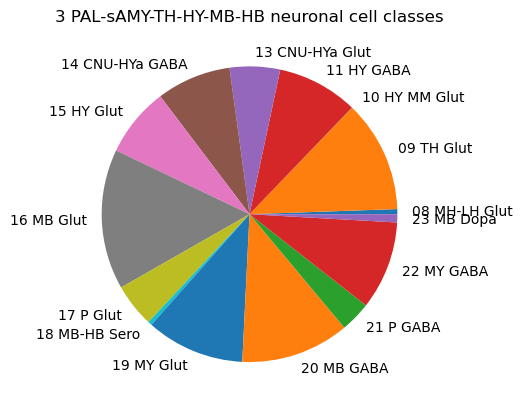

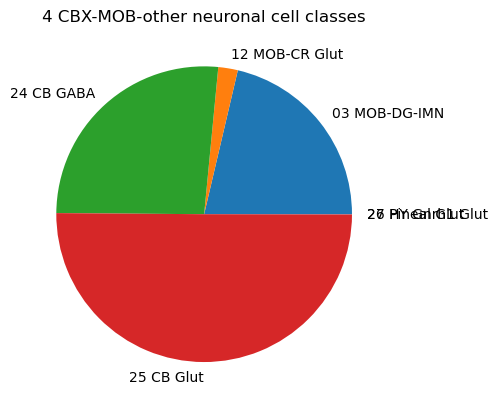

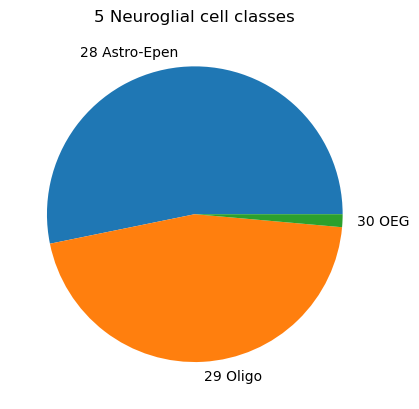

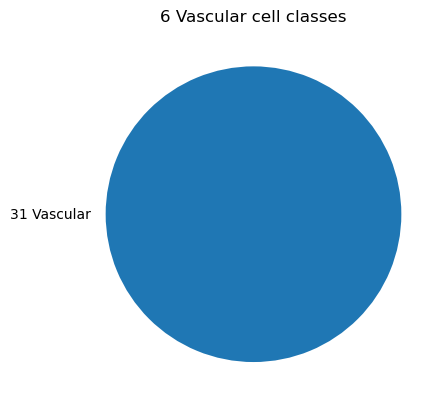

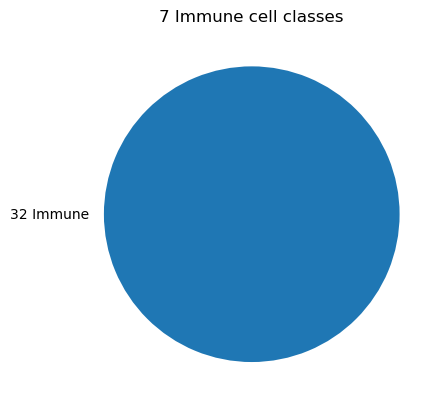

In [36]:
division_names = pd.Series(adata.obs['division'].unique())
division_names = division_names.sort_values()

for i, division_name in enumerate(division_names):
    fig, axs = plt.subplots()

    classes_by_division = adata.obs[adata.obs['division'] == division_name]['class']

    classes = classes_by_division.value_counts()
    classes = classes.sort_index()
    classes = classes[classes != 0]

    cell_types = classes.index
    cell_counts = []

    for i, cell_count in enumerate(classes):
        cell_counts.append(cell_count)
        

    axs.set_title(division_name + ' cell classes')
    axs.pie(cell_counts, labels=cell_types)
    plt.show()







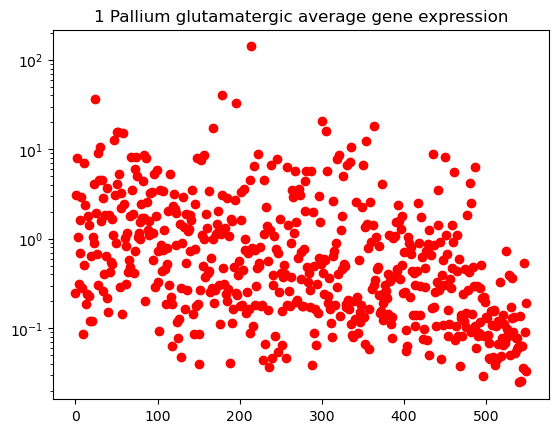

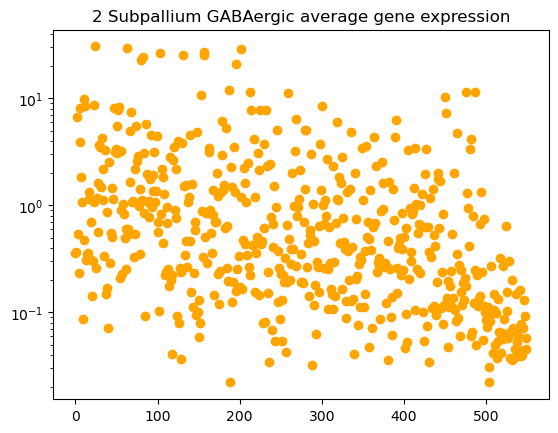

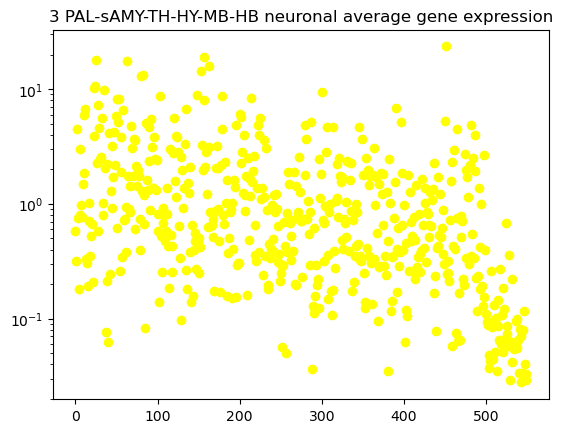

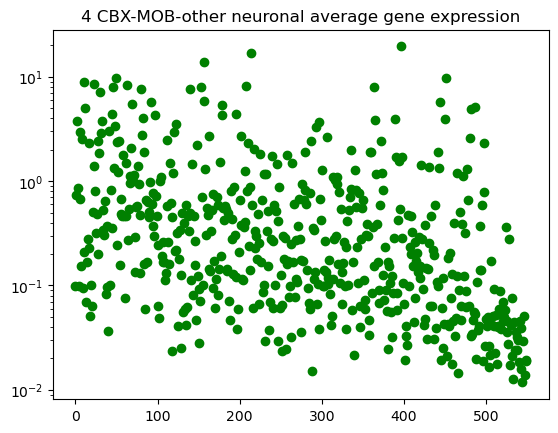

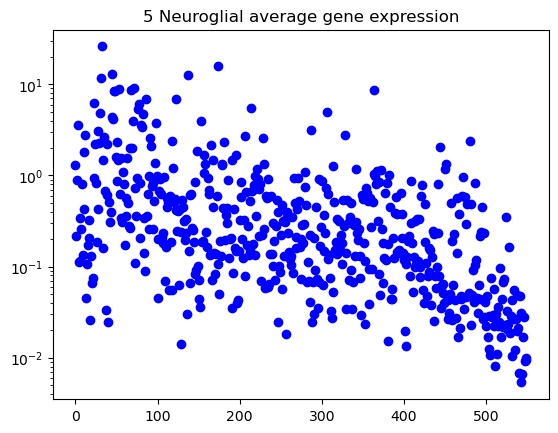

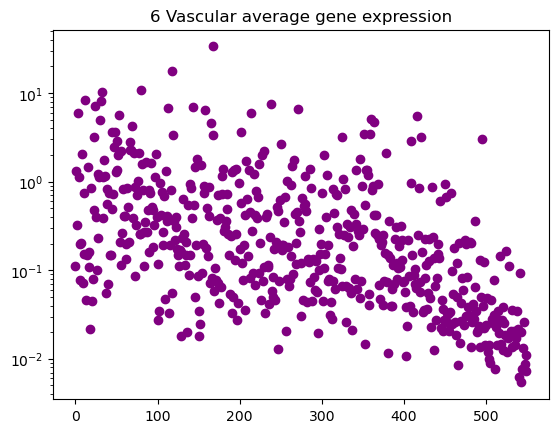

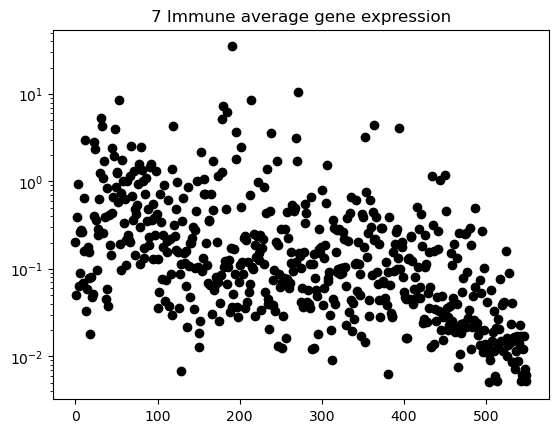

In [55]:
#Look at average gene expression levels in each division

division_names = pd.Series(adata.obs['division'].unique())
division_names = division_names.sort_values()
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black']

for i, division_name in enumerate(division_names):

    fig, axs = plt.subplots()

    cells_by_division = adata.X[adata.obs['division'] == division_name]
    average_expression = cells_by_division.mean(axis=0).A1

    x = np.arange(len(average_expression))  # Create an array of indices
    y = average_expression  # Your array values

    axs.scatter(x, y, color=colors[i])
    axs.set_yscale('log')
    axs.set_title(division_name + ' average gene expression')
    plt.show()



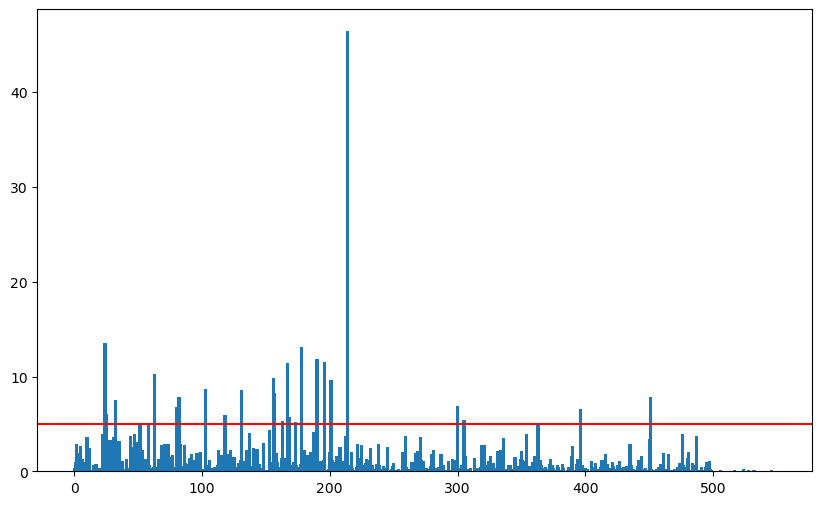

In [8]:
#Look at average gene expression levels in each division

division_names = pd.Series(adata.obs['division'].unique())
division_names = division_names.sort_values()
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black']

average_expressions = []

for i, division_name in enumerate(division_names):

    cells_by_division = adata.X[adata.obs['division'] == division_name]
    average_expression = cells_by_division.mean(axis=0).A1
    average_expressions.append(average_expression)

combined_matrix = np.vstack(average_expressions)

std_deviation = combined_matrix.std(axis=0)

x = np.arange(len(std_deviation))  # Create an array of indices
y = std_deviation  # Your array values

plt.figure(figsize=(10, 6))
plt.bar(x, y, width=2.5)
plt.axhline(y=5, color='red')
plt.show()


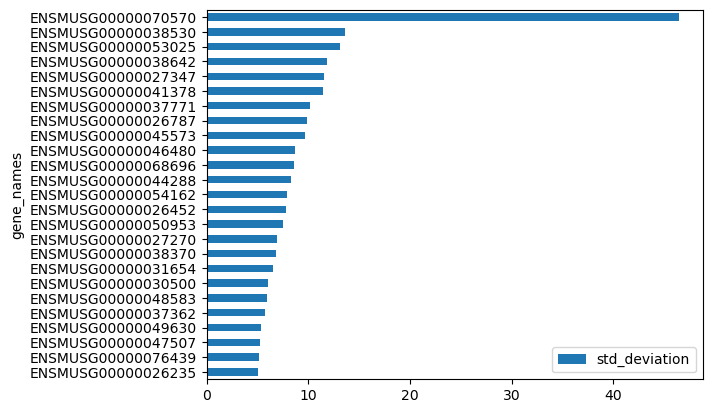

In [15]:
division_names = pd.Series(adata.obs['division'].unique())
division_names = division_names.sort_values()
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black']

average_expressions = []

for i, division_name in enumerate(division_names):

    cells_by_division = adata.X[adata.obs['division'] == division_name]
    average_expression = cells_by_division.mean(axis=0).A1
    average_expressions.append(average_expression)

combined_matrix = np.vstack(average_expressions)

std_deviation = combined_matrix.std(axis=0)

df = pd.DataFrame({
    'gene_names': adata.var_names,
    'std_deviation': std_deviation    
})

df = df.sort_values('std_deviation', ascending=False)

#dftop = df.head(20)
dftop = df[df['std_deviation'] >= 5]

fig, ax = plt.subplots()
dftop.plot(kind='barh', x='gene_names', y='std_deviation', ax=ax)
ax.invert_yaxis()
plt.show()
